In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Import Dependencies, Framework and Libaries
### Get Image Datum <br>
### Implement input Pipelines and transformations
### Build Model<br>
### Model Evaluation Metrics, Loss and Optimzers<br>
### Train Model<br>
### Evaluate<br>
### 'Conclusion'**

## Import Dependencies, Framework and Libaries

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
!pip install torchmetrics
from torchmetrics import Accuracy, Precision, F1Score
from pathlib import Path
from torch import optim

In [3]:
#Set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
train_path = Path('../input/coffee-bean-dataset-resized-224-x-224/train')
test_path = Path('../input/coffee-bean-dataset-resized-224-x-224/train')


In [5]:
##Transform Data for Trust Sake
from torchvision import transforms
transformer = torchvision.transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
])

In [6]:
##Load Image to Dataset 
train_folder = torchvision.datasets.ImageFolder(train_path, transform = transformer) 
test_folder = torchvision.datasets.ImageFolder(train_path, transform = transformer)
len(train_folder), len(test_folder)

(1200, 1200)

In [7]:
classes = test_folder.classes
classes

['Dark', 'Green', 'Light', 'Medium']

In [8]:
# Load a Simple
img, label = test_folder[0]

In [9]:
# Sample Details
img.shape, label

(torch.Size([3, 224, 224]), 0)

torch.Size([3, 224, 224])


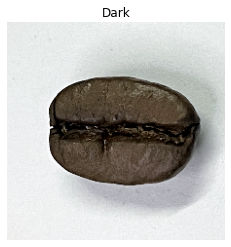

In [10]:
#Plot the Sample
import matplotlib.pyplot as plt
img_sample = img.permute(2, 1, 0)
print(img.shape)
plt.imshow(img_sample)
plt.title(classes[label]);
plt.axis('off');

### Get Model

In [11]:
import torchvision
from torchvision import models
import torchvision.models.efficientnet as e
import torchvision.models.resnet as r

In [12]:
#Load Weights for Training
WEIGHTS = r.resnet50(pretrained= True)
WEIGHTS2 = e.efficientnet_b0(pretrained= True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth


  0%|          | 0.00/20.5M [00:00<?, ?B/s]

In [13]:
#View Resnet Details
WEIGHTS.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [14]:
##Freeze Model Params for Transfer Learning
for p in WEIGHTS.parameters():
    p.requires_grad = False

In [15]:
len_of_class = len(classes)
len_of_class

4

In [16]:
import torch.nn as nn

In [17]:
WEIGHTS.fc = nn.Linear(2048, len_of_class)


In [18]:
#View Output Predictor
WEIGHTS.fc


Linear(in_features=2048, out_features=4, bias=True)

### Implement DataLoader

In [19]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(dataset =train_folder, batch_size =BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset= test_folder, batch_size = BATCH_SIZE)

### Evaluation Metrics/ Loss Function / Optimizers

In [20]:
model = WEIGHTS
#Take model to device
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
# Set up parameters
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.01)
accuracy_fn = Accuracy().to(device)
f1 = F1Score().to(device)

In [22]:
EPOCHS = 3

train_losses, train_acc = 0, 0

for epoch in range(EPOCHS):
  for batch, (X, y )in enumerate(train_loader):
    X = X.to(device)
    y = y.to(device)
    model.train()

    y_pred =model(X)
    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
    train_losses += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if batch % 100 == 0:
      print(f'{train_losses} | {train_acc}')

  train_losses /= len(train_loader)
  train_acc /= len(train_loader)
  print(f' Train Loss: {train_losses:.4f} | Train Acc: {train_acc:.3f}')

model.eval()
test_loss, test_acc, test_f1 = 0, 0, 0
with torch.inference_mode():
    for Xt, yt in test_loader:
        Xt = Xt.to(device)
        yt= yt.to(device)
        test_pred = model(X)
        t_loss = loss_fn(test_pred, y)
        test_loss += t_loss
        test_acc += accuracy_fn(test_pred.argmax(dim=1), y)
        test_f1 += f1(test_pred.argmax(dim=1), y)
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_f1 /= len(test_loader)
    
    print(f' Test Loss {test_loss:.4f} | Test Acc: {test_acc:.2f} | {test_f1}  ')

1.4637401103973389 | 0.1875
 Train Loss: 0.9374 | Train Acc: 0.758
1.063997507095337 | 1.6957237720489502
 Train Loss: 0.2242 | Train Acc: 0.953
0.3041607439517975 | 1.9220914840698242
 Train Loss: 0.1702 | Train Acc: 0.968
 Test Loss 0.0986 | Test Acc: 0.94 | 0.9375  


### CONCLUSION


In [23]:
### Using Resnet Model has 100% Accuracy, 100% F1Score with .005 Loss